In [1]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


  0%|          | 0.00/2.29G [00:00<?, ?B/s]
  0%|          | 1.00M/2.29G [00:00<19:48, 2.07MB/s]
  0%|          | 2.00M/2.29G [00:00<19:18, 2.12MB/s]
  0%|          | 3.00M/2.29G [00:01<20:46, 1.97MB/s]
  0%|          | 4.00M/2.29G [00:02<22:29, 1.82MB/s]
  0%|          | 5.00M/2.29G [00:03<26:57, 1.52MB/s]
  0%|          | 6.00M/2.29G [00:04<30:19, 1.35MB/s]
  0%|          | 7.00M/2.29G [00:05<36:20, 1.13MB/s]
  0%|          | 8.00M/2.29G [00:06<41:57, 975kB/s] 
  0%|          | 9.00M/2.29G [00:07<39:19, 1.04MB/s]
  0%|          | 10.0M/2.29G [00:08<36:30, 1.12MB/s]
  0%|          | 11.0M/2.29G [00:08<31:38, 1.29MB/s]
  1%|          | 12.0M/2.29G [00:09<26:35, 1.54MB/s]
  1%|          | 13.0M/2.29G [00:09<22:16, 1.83MB/s]
  1%|          | 14.0M/2.29G [00:09<18:24, 2.22MB/s]
  1%|          | 15.0M/2.29G [00:10<16:27, 2.48MB/s]
  1%|          | 16.0M/2.29G [00:10<15:32, 2.62MB/s]
  1%|          | 17.0M/2.29G [00:10<13:48, 2.95MB/s]
  1%|          | 18.0M/2.29G [00:10<12:59, 3.14MB/s]
 

 12%|█▏        | 274M/2.29G [02:37<13:40, 2.65MB/s]
 12%|█▏        | 275M/2.29G [02:37<12:53, 2.81MB/s]
 12%|█▏        | 276M/2.29G [02:37<12:05, 2.99MB/s]
 12%|█▏        | 277M/2.29G [02:38<10:54, 3.32MB/s]
 12%|█▏        | 278M/2.29G [02:38<10:25, 3.47MB/s]
 12%|█▏        | 279M/2.29G [02:38<09:25, 3.84MB/s]
 12%|█▏        | 280M/2.29G [02:38<08:53, 4.07MB/s]
 12%|█▏        | 281M/2.29G [02:39<09:02, 4.00MB/s]
 12%|█▏        | 282M/2.29G [02:39<08:22, 4.31MB/s]
 12%|█▏        | 283M/2.29G [02:39<07:47, 4.64MB/s]
 12%|█▏        | 284M/2.29G [02:39<07:20, 4.92MB/s]
 12%|█▏        | 285M/2.29G [02:39<06:53, 5.24MB/s]
 12%|█▏        | 286M/2.29G [02:39<06:55, 5.21MB/s]
 12%|█▏        | 287M/2.29G [02:40<06:45, 5.33MB/s]
 12%|█▏        | 288M/2.29G [02:40<06:06, 5.89MB/s]
 12%|█▏        | 289M/2.29G [02:40<06:02, 5.96MB/s]
 12%|█▏        | 290M/2.29G [02:40<05:30, 6.54MB/s]
 12%|█▏        | 291M/2.29G [02:40<05:31, 6.52MB/s]
 12%|█▏        | 292M/2.29G [02:40<05:50, 6.16MB/s]
 12%|█▏     

In [ ]:
!conda activate ml

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename).replace("\\","/"))

./chest_xray/test/NORMAL/IM-0001-0001.jpeg
./chest_xray/test/NORMAL/IM-0003-0001.jpeg
./chest_xray/test/NORMAL/IM-0005-0001.jpeg
./chest_xray/test/NORMAL/IM-0006-0001.jpeg
./chest_xray/test/NORMAL/IM-0007-0001.jpeg
./chest_xray/test/NORMAL/IM-0009-0001.jpeg
./chest_xray/test/NORMAL/IM-0010-0001.jpeg
./chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg
./chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg
./chest_xray/test/NORMAL/IM-0011-0001.jpeg
./chest_xray/test/NORMAL/IM-0013-0001.jpeg
./chest_xray/test/NORMAL/IM-0015-0001.jpeg
./chest_xray/test/NORMAL/IM-0016-0001.jpeg
./chest_xray/test/NORMAL/IM-0017-0001.jpeg
./chest_xray/test/NORMAL/IM-0019-0001.jpeg
./chest_xray/test/NORMAL/IM-0021-0001.jpeg
./chest_xray/test/NORMAL/IM-0022-0001.jpeg
./chest_xray/test/NORMAL/IM-0023-0001.jpeg
./chest_xray/test/NORMAL/IM-0025-0001.jpeg
./chest_xray/test/NORMAL/IM-0027-0001.jpeg
./chest_xray/test/NORMAL/IM-0028-0001.jpeg
./chest_xray/test/NORMAL/IM-0029-0001.jpeg
./chest_xray/test/NORMAL/IM-0030-0001.jpeg
.

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import pandas as pd
import numpy as np
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import json

In [4]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        path = path.replace("\\","/")
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
               
    return np.array(data)

In [5]:
train = get_training_data('./chest_xray//train')
test = get_training_data('./chest_xray/test')
val = get_training_data('./chest_xray/val')

C:\Users\admin\AppData\Local\Temp\ipykernel_16984\37752883.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [6]:
train.shape

(5216, 2)

In [7]:
train[1][0]

array([[61, 70, 76, ..., 28, 25, 22],
       [75, 81, 80, ..., 28, 24, 23],
       [86, 83, 85, ..., 31, 23, 21],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

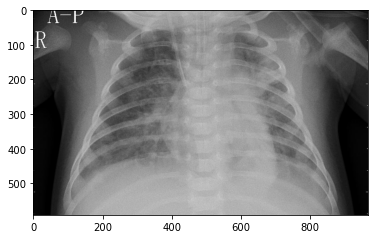

In [11]:
img = cv2.imread("./chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg")
plt.imshow(img)
plt.show()

c:\Users\admin\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

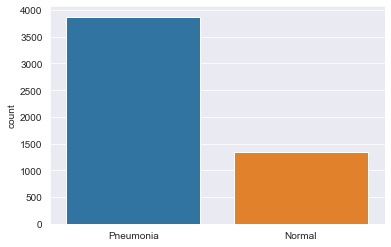

In [8]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)        

Text(0.5, 1.0, 'NORMAL')

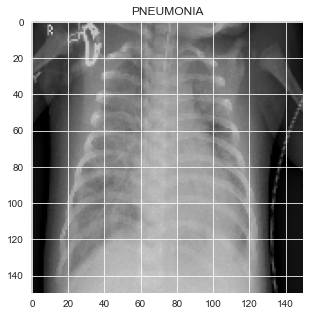

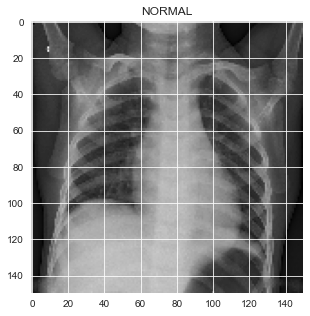

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [10]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [11]:
x_train[0]

array([[18, 28, 29, ..., 13,  7,  1],
       [21, 24, 29, ..., 14,  9,  3],
       [22, 26, 32, ..., 16,  9,  2],
       ...,
       [10,  9,  8, ..., 15, 15, 15],
       [10, 10,  8, ..., 15, 15, 15],
       [10, 10,  8, ..., 15, 15, 15]], dtype=uint8)

In [12]:
y_train[0]

0

In [13]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [14]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [19]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [20]:
x_train.shape

(5216, 150, 150, 1)

In [44]:
x_test.shape

(624, 150, 150, 1)

In [21]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [54]:
#./chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
def preprocess(path):
    img_size = 150
    img_arr = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    arr = cv2.resize(img_arr, (img_size, img_size))
    arr = np.array(arr)/255
    
    return arr
    

In [48]:
preprocess(input())

(150, 150)


array([[0.06666667, 0.0745098 , 0.0745098 , ..., 0.07058824, 0.05098039,
        0.05490196],
       [0.06666667, 0.0745098 , 0.09019608, ..., 0.13333333, 0.08627451,
        0.06666667],
       [0.0627451 , 0.0745098 , 0.10196078, ..., 0.18431373, 0.15294118,
        0.09411765],
       ...,
       [0.02352941, 0.02352941, 0.01960784, ..., 0.00784314, 0.00784314,
        0.01176471],
       [0.02352941, 0.02352941, 0.02352941, ..., 0.00784314, 0.00784314,
        0.01960784],
       [0.02745098, 0.02352941, 0.02352941, ..., 0.00784314, 0.00784314,
        0.01568627]])

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=2,factor=0.3, min_lr=0.000001)

In [26]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 204s 1s/step - loss: 0.3540 - accuracy: 0.8595 - val_loss: 33.0880 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 220s 1s/step - loss: 0.2729 - accuracy: 0.9015 - val_loss: 16.9721 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - 216s 1s/step - loss: 0.2270 - accuracy: 0.9187 - val_loss: 7.4104 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 215s 1s/step - loss: 0.2062 - accuracy: 0.9319 - val_loss: 30.4385 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/12
163/163 [==============================] - ETA: 0s - loss: 0.2048 - accuracy: 0.9342
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 213s 1s/step - loss: 0.2048 - accuracy: 0.9342 - val_loss: 3.1213 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 6/12
163/163 [==============================] - 19

In [25]:
print("Loss of the model is - " , loaded_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , loaded_model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 5s 218ms/step - loss: 0.2687 - accuracy: 0.9295
Loss of the model is -  0.26873746514320374
20/20 [==============================] - 4s 208ms/step - loss: 0.2687 - accuracy: 0.9295
Accuracy of the model is -  92.94871687889099 %


In [28]:
model.save('model2.h5')

In [15]:
loaded_model = load_model('model2.h5')

NameError: name 'history' is not defined

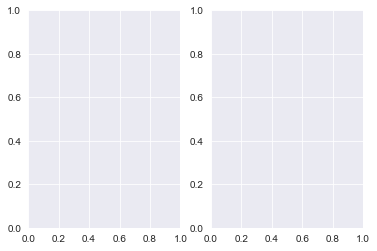

In [16]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [43]:
#path = input()
#img = cv2.imread(path)
#print(preprocess(path).shape)
prediction_probability = loaded_model.predict(x_test)
prediction_classes = (prediction_probability>0.5).astype(int)
#predictions = prediction_classes.reshape(1,-1)[0]
prediction_classes

ValueError: in user code:

    File "c:\Users\admin\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\admin\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\admin\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\admin\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "c:\Users\admin\anaconda3\envs\ml\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\admin\anaconda3\envs\ml\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 150)
    
    Call arguments received:
      • inputs=('tf.Tensor(shape=(None, 150), dtype=uint8)',)
      • training=False
      • mask=None


In [39]:
print(classification_report(y_test, prediction_classes, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.93      0.96      0.94       390
   Normal (Class 1)       0.92      0.88      0.90       234

           accuracy                           0.93       624
          macro avg       0.93      0.92      0.92       624
       weighted avg       0.93      0.93      0.93       624



In [40]:
cm = confusion_matrix(y_test,prediction_classes)
cm

array([[373,  17],
       [ 27, 207]], dtype=int64)

In [63]:
img_size = 150
input_data = []
print("Please Upload you X-Ray Image")
path = input()
input_data.append(preprocess(path))
input_data = np.array(input_data)
input_data = input_data.reshape(-1,150,150,1)
def make_prediction(input_data):
    prediction_probability = loaded_model.predict(input_data)
    prediction_classes = (prediction_probability>0.5).astype(int)
    label_dict = {0: "Normal", 1: "Pneumonia"}
    replace_func = np.vectorize(lambda x: label_dict[x])
    result = replace_func(prediction_classes)
    return result
result = make_prediction(input_data)
with open('output.json', 'w') as outfile:
    # Write the output to the file using the json.dump() function
    json.dump(result.tolist(), outfile)


Please Upload you X-Ray Image


In [21]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

NameError: name 'cm' is not defined

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1